<a href="https://colab.research.google.com/github/VictorRegueira/mlops-varr/blob/main/Entrega1/MLOps_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
pre_df = pd.read_csv("/content/drive/MyDrive/0-Actual/MLOps-Bootcamp/ProyectoIndividual/Tetuan City power consumption.csv")

# Explore the data
pre_df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


Configuración de los gráficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (5,5)

# Seaborn
penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo':'#0f7175ff',
    'Chinstrap':'#c65dc9ff',
    'Torgersen': '#955FC8',
    'Biscoe': '#94e2c3',
    'Dream': '#345469',
    'Female': 'pink',
    'Male': 'skyblue',
}

# Matplotlib
pcolors =['#ff6602ff','#0f7175ff','#c65dc9ff']
icolors =['#955FC8', '#94e2c3', '#345469']
scolors =['pink','skyblue',]

plt_colors=[pcolors,icolors,scolors]

In [4]:
pre_df.shape

(52416, 9)

In [5]:
pre_df.dtypes

DateTime                      object
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
general diffuse flows        float64
diffuse flows                float64
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
dtype: object

In [6]:
pre_df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

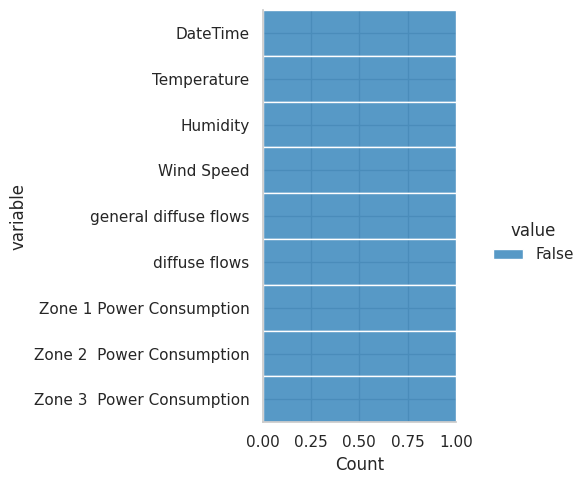

In [7]:
pre_df.isnull().melt().pipe(
    lambda pre_df: (
        sns.displot(data=pre_df, y='variable', hue='value', multiple='fill')))

Vamos a renombrar los nombres de las columnas para hacerlo de forma más sencillo.

In [8]:
# Cambiar los nombres de las columnas
pre_df.rename(columns={
    'DateTime': 'date_time',
    'Temperature': 'temperature',
    'Humidity': 'humidity',
    'Wind Speed': 'wind_speed',
    'general diffuse flows': 'general_diffuse_flows',
    'diffuse flows': 'diffuse_flows',
    'Zone 1 Power Consumption': 'zone1',
    'Zone 2  Power Consumption': 'zone2',
    'Zone 3  Power Consumption': 'zone3'
}, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar el cambio
pre_df.head()


,date_time,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone1,zone2,zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [9]:
pre_df.columns

Index(['date_time', 'temperature', 'humidity', 'wind_speed',
       'general_diffuse_flows', 'diffuse_flows', 'zone1', 'zone2', 'zone3'],
      dtype='object')

Convertimos el valor de date_time que teníamos asignado como objeto a fecha.

In [10]:
# Convertir la variable date_time a tipo datetime
pre_df['date_time'] = pd.to_datetime(pre_df['date_time'], format='%m/%d/%Y %H:%M')

# Verificar el cambio
print(pre_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_time              52416 non-null  datetime64[ns]
 1   temperature            52416 non-null  float64       
 2   humidity               52416 non-null  float64       
 3   wind_speed             52416 non-null  float64       
 4   general_diffuse_flows  52416 non-null  float64       
 5   diffuse_flows          52416 non-null  float64       
 6   zone1                  52416 non-null  float64       
 7   zone2                  52416 non-null  float64       
 8   zone3                  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB
None


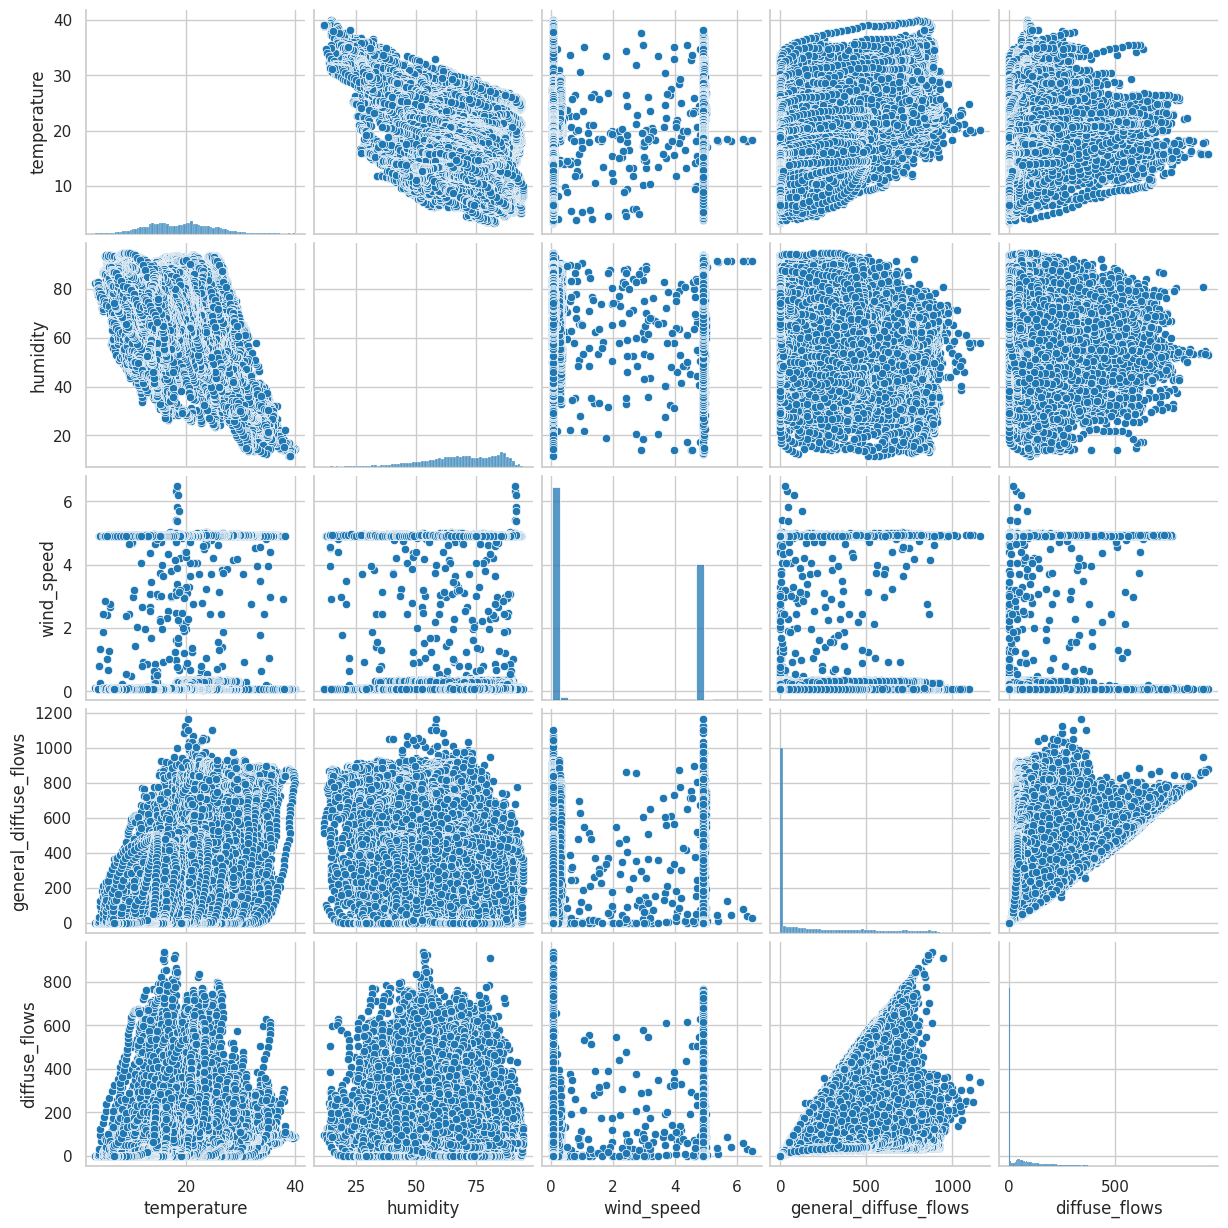

In [11]:
# Visualizar la distribución de los datos
sns.pairplot(pre_df[['date_time', 'temperature', 'humidity', 'wind_speed',
       'general_diffuse_flows', 'diffuse_flows']])
plt.show()

In [12]:
# Dividir los datos en características (X) y target (y)
X = pre_df[['date_time', 'temperature', 'humidity', 'wind_speed',
       'general_diffuse_flows', 'diffuse_flows']]
y = pre_df[['zone1', 'zone2', 'zone3']]

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41932, 6)
(10484, 6)
(41932, 3)
(10484, 3)


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer

# Definir las funciones de transformación personalizadas
def extract_date_features(X):
    # Convertir la columna de fecha y hora a tipo datetime
    X['date_time'] = pd.to_datetime(X['date_time'])
    # Extraer características de la fecha y hora
    X['year'] = X['date_time'].dt.year
    X['month'] = X['date_time'].dt.month
    X['day'] = X['date_time'].dt.day
    X['hour'] = X['date_time'].dt.hour
    X['minute'] = X['date_time'].dt.minute
    # Eliminar la columna original de fecha y hora
    X.drop(columns=['date_time'], inplace=True)
    return X

# Definir el transformador para fechas
date_transformer = Pipeline(steps=[
    ('date_extraction', FunctionTransformer(extract_date_features)),
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))  # Imputar valores faltantes (en caso de que los haya)
])

# Definir el transformador para características numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escalar los datos
])

# Definir las columnas por tipo de datos
datetime_cols = ['date_time']
numeric_cols = ['temperature', 'humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows']
target_cols = ['zone1', 'zone2', 'zone3']

# Combinar los transformadores utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('date', date_transformer, datetime_cols),
        ('numeric', numeric_transformer, numeric_cols)
    ]
)

# Usar el preprocesador
preprocessor

ColumnTransformer(transformers=[('date',
                                 Pipeline(steps=[('date_extraction',
                                                  FunctionTransformer(func=<function extract_date_features at 0x7f03ccc46200>)),
                                                 ('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['date_time']),
                                ('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['temperature', 'humidity', 'wind_speed',
                                  'general_diffuse_flows', 'diffuse_flows'])])

In [17]:
# Aplicar el pipeline al conjunto de entrenamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [18]:
# Entrenar un modelo de regresión RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Evaluar el modelo
y_pred = model.predict(X_test_preprocessed)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 441738.7323787546


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_regression_metrics(y_true, y_pred):
    """
    Calcula métricas de regresión como el error cuadrático medio (MSE),
    el error absoluto medio (MAE) y el coeficiente de determinación (R^2).

    Args:
    y_true: numpy array o lista, valores reales del objetivo.
    y_pred: numpy array o lista, valores predichos del objetivo.

    Returns:
    metrics: dict, un diccionario que contiene las métricas calculadas.
    """
    # Calcular métricas
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Almacenar métricas en un diccionario
    metrics = {
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'R^2 Score': r2
    }

    return metrics



In [21]:
# Calcular métricas
metrics_regression = calculate_regression_metrics(y_test, y_pred)
print(metrics_regression)

{'Mean Squared Error (MSE)': 441738.7323787546, 'Mean Absolute Error (MAE)': 415.549594237375, 'R^2 Score': 0.9882692862881405}
